
# <p style="text-align: center;">MIS 382: Advanced Predictive Modelling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Paige McKenzie (pam2932), Yannick Heard (yoh64)</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wednesday, November 8th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for all students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Bayesian classifiers (LDA, QDA and Naive Bayes) The code below loads the dataset and all necessary sklearn modules. Look up any module on the scikit-learn website for a full description.

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being digits 8 or digits 9 for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line) 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

## Solutions

In [22]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [24]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800L, 784L), (11800L,), (1983L, 784L), (1983L,))


## Fitting the models on the training data and creating the arrays of probabilities for later use

In [25]:
llf = LDA()
llf.fit(X_train, y_train)
prediction_LDA=[]
prediction_LDA= llf.predict_proba(X_test)
array_LDA=[]
for i in prediction_LDA:
    print i
    array_LDA.append(i[1])

[  9.99740516e-01   2.59484124e-04]
[  9.99999830e-01   1.69840181e-07]
[  9.99978789e-01   2.12106777e-05]
[  9.99999576e-01   4.24434773e-07]
[  9.99999900e-01   1.00228682e-07]
[  9.99991292e-01   8.70804478e-06]
[  9.99840385e-01   1.59615021e-04]
[  1.00000000e+00   1.96909403e-12]
[  9.99999999e-01   6.09694792e-10]
[  9.99918885e-01   8.11149716e-05]
[  9.99999759e-01   2.41487585e-07]
[  1.00000000e+00   2.04900587e-10]
[ 0.12804122  0.87195878]
[  9.99987093e-01   1.29066182e-05]
[  1.00000000e+00   9.59506338e-12]
[  9.99999005e-01   9.94698418e-07]
[  9.99999636e-01   3.63646985e-07]
[  9.99824383e-01   1.75617484e-04]
[  9.99904400e-01   9.56003343e-05]
[ 0.98814284  0.01185716]
[  9.99994355e-01   5.64512025e-06]
[  1.00000000e+00   7.37562126e-12]
[  9.99999846e-01   1.53775054e-07]
[  9.99998259e-01   1.74100877e-06]
[  1.00000000e+00   8.41726157e-11]
[  9.99994955e-01   5.04470103e-06]
[  9.99999986e-01   1.40194173e-08]
[  9.99972495e-01   2.75049663e-05]
[ 0.48101743

[ 0.92042886  0.07957114]
[ 0.892596  0.107404]
[  9.99996729e-01   3.27124192e-06]
[  9.99998356e-01   1.64379337e-06]
[ 0.63404128  0.36595872]
[  9.99999763e-01   2.37266619e-07]
[  9.99999998e-01   2.27877031e-09]
[  9.99994606e-01   5.39360075e-06]
[ 0.9957845  0.0042155]
[  9.99999970e-01   2.95761293e-08]
[ 0.24390064  0.75609936]
[  9.99999997e-01   2.96105711e-09]
[  1.00000000e+00   7.68539161e-11]
[  9.99964649e-01   3.53513868e-05]
[  9.99994391e-01   5.60907273e-06]
[  9.99996009e-01   3.99109416e-06]
[ 0.99825656  0.00174344]
[  9.99914511e-01   8.54894739e-05]
[  9.99998792e-01   1.20820394e-06]
[ 0.98874166  0.01125834]
[  9.99924461e-01   7.55394978e-05]
[  9.99999537e-01   4.62861848e-07]
[  9.99995921e-01   4.07861818e-06]
[ 0.15941701  0.84058299]
[  9.99698554e-01   3.01446076e-04]
[  9.99851284e-01   1.48716337e-04]
[ 0.98610509  0.01389491]
[  9.99999754e-01   2.46442537e-07]
[  1.00000000e+00   5.91370101e-13]
[  1.00000000e+00   2.13392685e-13]
[  9.99999991e-0

[  9.99988890e-01   1.11104779e-05]
[  9.99999959e-01   4.10821346e-08]
[  9.99999823e-01   1.77212756e-07]
[  9.99998378e-01   1.62166338e-06]
[  9.99998104e-01   1.89631664e-06]
[  9.99999913e-01   8.68515953e-08]
[  9.99885181e-01   1.14818734e-04]
[  9.99999712e-01   2.87555409e-07]
[  9.99999827e-01   1.72958370e-07]
[  9.99999518e-01   4.82486200e-07]
[  9.99967219e-01   3.27806502e-05]
[  9.99999383e-01   6.16759576e-07]
[  9.99993949e-01   6.05118368e-06]
[  9.99999685e-01   3.14561105e-07]
[  9.99999308e-01   6.91716601e-07]
[  9.99913849e-01   8.61510095e-05]
[  9.99999835e-01   1.65181531e-07]
[  1.00000000e+00   9.12330081e-11]
[  9.99998441e-01   1.55941044e-06]
[  9.99982711e-01   1.72893511e-05]
[  9.99999994e-01   6.37981882e-09]
[  9.99993661e-01   6.33936804e-06]
[  9.99959223e-01   4.07772194e-05]
[  9.99191724e-01   8.08275534e-04]
[  9.99993101e-01   6.89894582e-06]
[ 0.92035662  0.07964338]
[ 0.99893742  0.00106258]
[ 0.99878962  0.00121038]
[ 0.99574136  0.004258

[  1.05653633e-06   9.99998943e-01]
[  2.04878107e-06   9.99997951e-01]
[  6.94980334e-05   9.99930502e-01]
[  7.74279232e-07   9.99999226e-01]
[  1.33771882e-09   9.99999999e-01]
[  6.90394332e-08   9.99999931e-01]
[  1.34948333e-05   9.99986505e-01]
[  1.59128461e-06   9.99998409e-01]
[  1.94961835e-05   9.99980504e-01]
[  5.26730036e-06   9.99994733e-01]
[  1.26917206e-06   9.99998731e-01]
[  2.09534967e-08   9.99999979e-01]
[  6.70603268e-06   9.99993294e-01]
[  4.72687062e-05   9.99952731e-01]
[  4.14045752e-07   9.99999586e-01]
[  1.41947898e-09   9.99999999e-01]
[  7.43271664e-07   9.99999257e-01]
[  1.48804475e-07   9.99999851e-01]
[ 0.9980781  0.0019219]
[  2.03345110e-08   9.99999980e-01]
[  1.79094437e-07   9.99999821e-01]
[  4.01115254e-07   9.99999599e-01]
[  3.31167323e-06   9.99996688e-01]
[ 0.00464539  0.99535461]
[  7.04498444e-05   9.99929550e-01]
[ 0.0159076  0.9840924]
[ 0.01299272  0.98700728]
[  9.99999892e-01   1.08270800e-07]
[  3.71377702e-07   9.99999629e-01]


[  1.40193386e-06   9.99998598e-01]
[  2.74381857e-06   9.99997256e-01]
[  2.82793798e-08   9.99999972e-01]
[  1.21135156e-07   9.99999879e-01]
[  7.62028756e-06   9.99992380e-01]
[  6.21355123e-09   9.99999994e-01]
[  1.61639591e-11   1.00000000e+00]
[ 0.00194623  0.99805377]
[ 0.00443575  0.99556425]
[  1.94842941e-08   9.99999981e-01]
[  9.93539712e-08   9.99999901e-01]
[  2.43095388e-04   9.99756905e-01]
[  1.40432842e-04   9.99859567e-01]
[  3.29108888e-07   9.99999671e-01]
[  8.77738527e-08   9.99999912e-01]
[  2.23439588e-07   9.99999777e-01]
[  3.18182218e-05   9.99968182e-01]
[  2.01524578e-06   9.99997985e-01]
[  7.12700565e-09   9.99999993e-01]
[  1.07595332e-07   9.99999892e-01]
[  9.80288105e-08   9.99999902e-01]
[  1.17531984e-10   1.00000000e+00]
[  1.35171147e-05   9.99986483e-01]
[  4.39385360e-07   9.99999561e-01]
[  6.58437222e-05   9.99934156e-01]
[  7.50744922e-09   9.99999992e-01]
[  1.92901033e-06   9.99998071e-01]
[  1.21844709e-08   9.99999988e-01]
[  1.6185601

[  3.75168143e-07   9.99999625e-01]
[  2.05889426e-08   9.99999979e-01]
[  4.74010310e-06   9.99995260e-01]
[  2.61483724e-09   9.99999997e-01]
[  9.01388642e-09   9.99999991e-01]
[  5.25827345e-07   9.99999474e-01]
[  7.03093034e-07   9.99999297e-01]
[  8.36205862e-06   9.99991638e-01]
[  1.89475952e-06   9.99998105e-01]
[  3.36970741e-04   9.99663029e-01]
[ 0.00219735  0.99780265]
[  5.62700998e-06   9.99994373e-01]
[  3.60381309e-07   9.99999640e-01]
[  1.49822625e-06   9.99998502e-01]
[  1.34001905e-06   9.99998660e-01]
[  7.66344189e-05   9.99923366e-01]
[  5.18761114e-06   9.99994812e-01]
[  1.77493759e-05   9.99982251e-01]
[ 0.00815809  0.99184191]
[  1.06890447e-05   9.99989311e-01]
[  1.74421182e-06   9.99998256e-01]
[  1.17330704e-08   9.99999988e-01]
[  3.35152373e-09   9.99999997e-01]
[  3.97790154e-06   9.99996022e-01]
[  1.89893667e-07   9.99999810e-01]
[ 0.00171761  0.99828239]
[  2.02948245e-08   9.99999980e-01]
[  1.04902241e-08   9.99999990e-01]
[ 0.00269144  0.997308

In [26]:
qlf = QDA()
qlf.fit(X_train, y_train)
prediction_QDA=[]
prediction_QDA= qlf.predict_proba(X_test)
array_QDA=[]
for i in prediction_QDA:
    print i
    array_QDA.append(i[1])

[  1.00000000e+000   1.25488809e-296]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   1.11610283e-113]
[  1.00000000e+000   4.49077426e-219]
[  1.00000000e+000   5.47906921e-168]
[  9.99999997e-01   2.80995589e-09]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   5.33017781e-319]
[ 1.  0.]
[  1.13273597e-210   1.00000000e+000]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+00   3.39663680e-31]
[  1.00000000e+000   1.32560332e-155]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   1.26199903e-179]
[  1.00000000e+00   4.11065767e-89]
[  1.00000000e+000   2.04745748e-125]
[  1.00000000e+000   7.48541251e-187]
[ 1.  0.]
[  3.10370784e-193   1.00000000e+000]
[  1.00000000e+00   1.09610862e-26]
[ 1.  0.]
[  2.77330424e-77   1.00000000e+00]
[  4.96258884e-81   1.00000000e+00]
[  1.00000000e+00   1.52999853e-66]
[  1.00000000e+000   3.86832330e-114]
[  1.00000000e+000   5.08230717e-254]
[ 1.  0.]
[  1.00000000e+00   9.62909618e-55]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.

[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   7.46832392e-163]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   4.22288146e-296]
[  1.00000000e+000   7.60861095e-322]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   4.05545262e-157]
[ 1.  0.]
[  1.00000000e+000   4.51760942e-247]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+00   4.53975560e-29]
[ 0.  1.]
[ 1.  0.]
[  1.00000000e+000   7.77614461e-301]
[ 1.  0.]
[  1.38088233e-118   1.00000000e+000]
[  3.06045987e-19   1.00000000e+00]
[  1.00000000e+000   2.54943088e-110]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+00   1.07098621e-20]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 0.  1.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   1.42947312e-265]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+00   1.57248147e-56]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  3.11803992e-04   9.99688196e-01]
[ 1.  0.]
[  3.19951951e-133   1.00000000e+000]
[  1.00000000e+00   1.40413187e-36]
[  1.00000000e+000   4.9

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]
[ 0.  1.]
[ 0.  1.]
[  6.50108442e-312   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  2.41188856e-145   1.00000000e+000]
[  2.96439388e-323   1.00000000e+000]
[  3.69736075e-229   1.00000000e+000]
[ 0.  1.]
[  2.79601270e-311   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  5.68700702e-19   1.00000000e+00]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  1.21514862e-250   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  1.00000000e+000   8.02594000e-112]
[ 0.  1.]
[  1.00000000e+000   1.15492722e-203]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 1.  0.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  2.66301383e-321   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 

In [27]:
glf = GaussianNB()
glf.fit(X_train, y_train)
prediction_GDA=[]
prediction_GDA= glf.predict_proba(X_test)
array_GDA=[]
for i in prediction_GDA:
    print i
    array_GDA.append(i[1])

[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  8.69353014e-05   9.99913065e-01]
[  1.00000000e+00   1.90750370e-75]
[  3.36855373e-10   1.00000000e+00]
[  6.11885951e-33   1.00000000e+00]
[  1.00000000e+000   1.50476070e-293]
[ 1.  0.]
[ 1.  0.]
[  6.82293188e-09   9.99999993e-01]
[  1.00000000e+000   1.59583204e-321]
[  2.76627732e-94   1.00000000e+00]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  6.69618058e-24   1.00000000e+00]
[  5.94450760e-91   1.00000000e+00]
[  1.00000000e+00   1.41775686e-73]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   5.42667575e-110]
[  2.10501885e-06   9.99997895e-01]
[  3.91938221e-38   1.00000000e+00]
[  1.00000000e+00   1.21053570e-67]
[  1.00000000e+00   3.53863896e-10]
[  6.37306048e-63   1.00000000e+00]
[  3.06458263e-11   1.00000000e+00]
[  5.18059657e-25   1.00000000e+00]
[  8.82231818e-40   1.00000000e+00]
[  1.26245945e-32   1.00000000e+00]
[  6.41593644e-69   1.00000000e+00]
[  2.12351083e-23   1.00000000e+00]
[  1.00000000e+00   1.82526738e-66]
[  1.00000

[  9.99657168e-01   3.42832370e-04]
[  1.35881028e-57   1.00000000e+00]
[  1.00000000e+00   5.28749998e-47]
[  9.80772811e-53   1.00000000e+00]
[ 1.  0.]
[  1.00000000e+000   4.06445852e-249]
[  1.00000000e+00   1.31193770e-28]
[ 1.  0.]
[  2.51735840e-21   1.00000000e+00]
[ 1.  0.]
[  8.28319615e-84   1.00000000e+00]
[  1.00000000e+000   4.66957462e-177]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   2.93578506e-220]
[  7.73333830e-54   1.00000000e+00]
[  6.29508218e-128   1.00000000e+000]
[ 1.  0.]
[  6.19984685e-99   1.00000000e+00]
[  5.92944422e-06   9.99994071e-01]
[ 1.  0.]
[  1.00000000e+000   4.87025877e-280]
[ 1.  0.]
[  1.00000000e+00   3.98258232e-72]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+00   9.25157693e-44]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   6.42285340e-323]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   3.49001621e-207]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]
[  1.00000000e+000   4.67464575e

[ 0.  1.]
[  2.97870918e-95   1.00000000e+00]
[  3.88182419e-101   1.00000000e+000]
[  2.47469165e-92   1.00000000e+00]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  1.85706317e-113   1.00000000e+000]
[ 1.  0.]
[  2.29268608e-125   1.00000000e+000]
[ 0.  1.]
[  3.38379070e-111   1.00000000e+000]
[  7.85866686e-145   1.00000000e+000]
[  2.63574511e-256   1.00000000e+000]
[  7.36713421e-189   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[  6.27624988e-106   1.00000000e+000]
[  1.08783794e-73   1.00000000e+00]
[  1.82442456e-23   1.00000000e+00]
[  3.32636073e-68   1.00000000e+00]
[  5.41603715e-297   1.00000000e+000]
[  1.11140574e-104   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[  2.61504831e-117   1.00000000e+000]
[  3.48512465e-286   1.00000000e+000]
[  7.65827978e-95   1.00000000e+00]
[  1.72064441e-153   1.00000000e+000]
[  6.42466415e-177   1.00000000e+000]
[  9.83147887e-108   1.00000000e+000]
[ 0.  1.]
[  2.29635240e-109   1.00000000e+000]
[  1.75725266e-165   1.00000000e+000]
[  7.64510640e-111

[  2.95959913e-112   1.00000000e+000]
[  1.47430982e-163   1.00000000e+000]
[ 0.  1.]
[  3.65220921e-124   1.00000000e+000]
[  2.04704276e-113   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  1.07281216e-166   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[  1.36687844e-145   1.00000000e+000]
[  2.56815214e-143   1.00000000e+000]
[  1.61162422e-114   1.00000000e+000]
[  6.96503317e-129   1.00000000e+000]
[  3.68067195e-131   1.00000000e+000]
[  2.95038268e-151   1.00000000e+000]
[  1.26351637e-168   1.00000000e+000]
[  9.27817303e-124   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  2.67727220e-119   1.00000000e+000]
[  6.15895607e-107   1.00000000e+000]
[  1.08565601e-105   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[  9.46749519e-140   1.00000000e+000]
[  8.41298128e-148   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[  2.29483693e-126   1.00000000e+000]
[  1.06142948e-21   1.00000000e+00]
[  6.84291786e-141   1.00000000e+000]
[  3.13570691e-266   1.00000000e+000]
[  2.59531730e-1

[ 0.  1.]
[ 0.  1.]
[  3.81024736e-105   1.00000000e+000]
[  4.07235876e-95   1.00000000e+00]
[ 0.  1.]
[  8.15743913e-117   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  2.74046912e-134   1.00000000e+000]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[  3.80773940e-130   1.00000000e+000]
[ 0.  1.]
[  2.64236048e-118   1.00000000e+000]
[ 0.  1.]
[  3.14931422e-208   1.00000000e+000]
[  1.21173455e-95   1.00000000e+00]
[  4.99679951e-103   1.00000000e+000]
[  1.52683107e-102   1.00000000e+000]
[  2.13163514e-100   1.00000000e+000]
[  2.00569249e-72   1.00000000e+00]
[ 0.  1.]
[ 0.  1.]
[  1.31957084e-90   1.00000000e+00]
[  6.31338108e-64   1.00000000e+00]
[  1.35367651e-83   1.00000000e+00]
[  6.72861278e-101   1.00000000e+000]
[  1.14610502e-98   1.00000000e+00]
[ 1.  0.]
[  2.93177294e-144   1.00000000e+000]
[  1.03390852e-90   1.00000000e+00]
[  3.76370776e-125   1.00000000e+000]
[ 0.  1.]
[  6.33767309e-106   1.00000000e+000]
[  1.54281894e-137   1.00000000e+000]
[  4.26713893e-132  

## Getting the values for the roc curve for each model, then plotting them all

In [28]:
fpr_GDA, tpr_GDA, thresholds_GDA = roc_curve(y_test, array_GDA, pos_label=1)
fpr_LDA, tpr_LDA, thresholds_LDA = roc_curve(y_test, array_LDA, pos_label=1)
fpr_QDA, tpr_QDA, thresholds_QDA = roc_curve(y_test, array_QDA, pos_label=1)

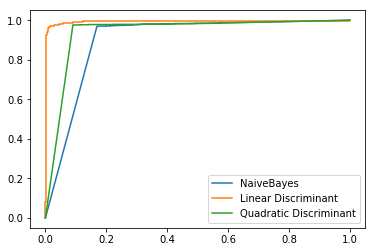

In [29]:
names  = ['NaiveBayes', 'Linear Discriminant', 'Quadratic Discriminant']
plt.plot(fpr_GDA, tpr_GDA)
plt.plot(fpr_LDA, tpr_LDA)
plt.plot(fpr_QDA, tpr_QDA)
plt.legend(names)
plt.show()

## Getting the area under each ROC curve 

In [30]:
GDAROC = roc_auc_score(y_test, array_GDA)
LDAROC = roc_auc_score(y_test, array_LDA)
QDAROC = roc_auc_score(y_test, array_QDA)

print 'Naive Bayes ROC area under the curve is =', GDAROC
print 'Quadratic Discriminator ROC area under the curve is =', QDAROC
print 'Linear Discriminator ROC area under the curve is =', LDAROC

Naive Bayes ROC area under the curve is = 0.901658177023
Quadratic Discriminator ROC area under the curve is = 0.941371089354
Linear Discriminator ROC area under the curve is = 0.993605802399


# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

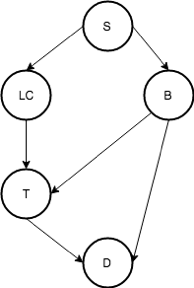

In [31]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

## Solutions

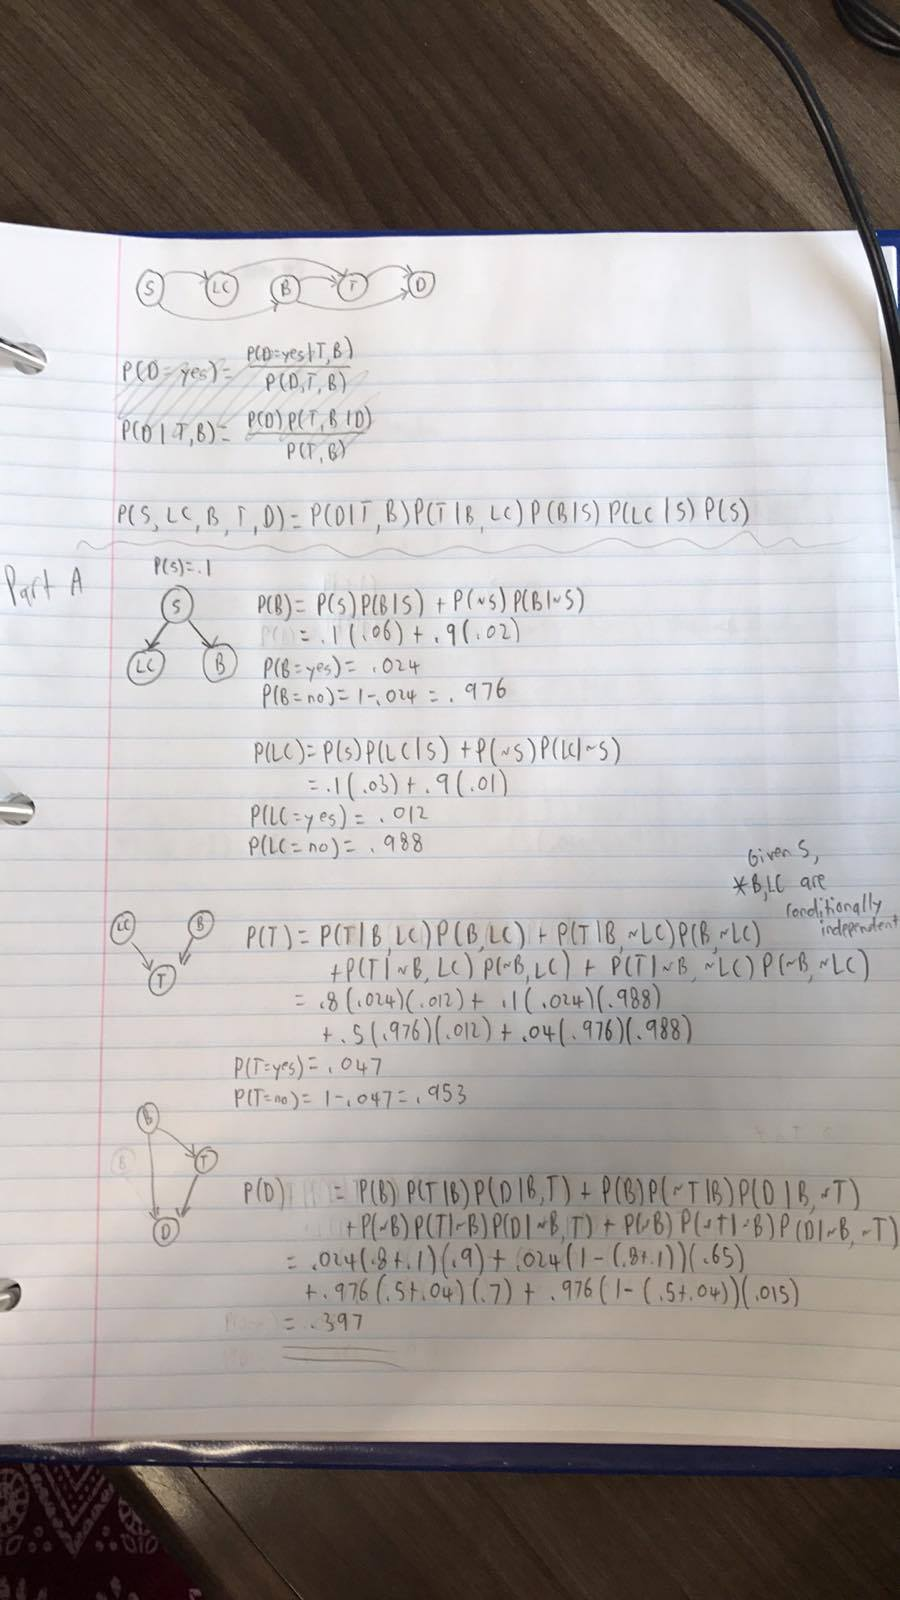

In [32]:
from IPython.display import Image
Image("PartA.JPG")

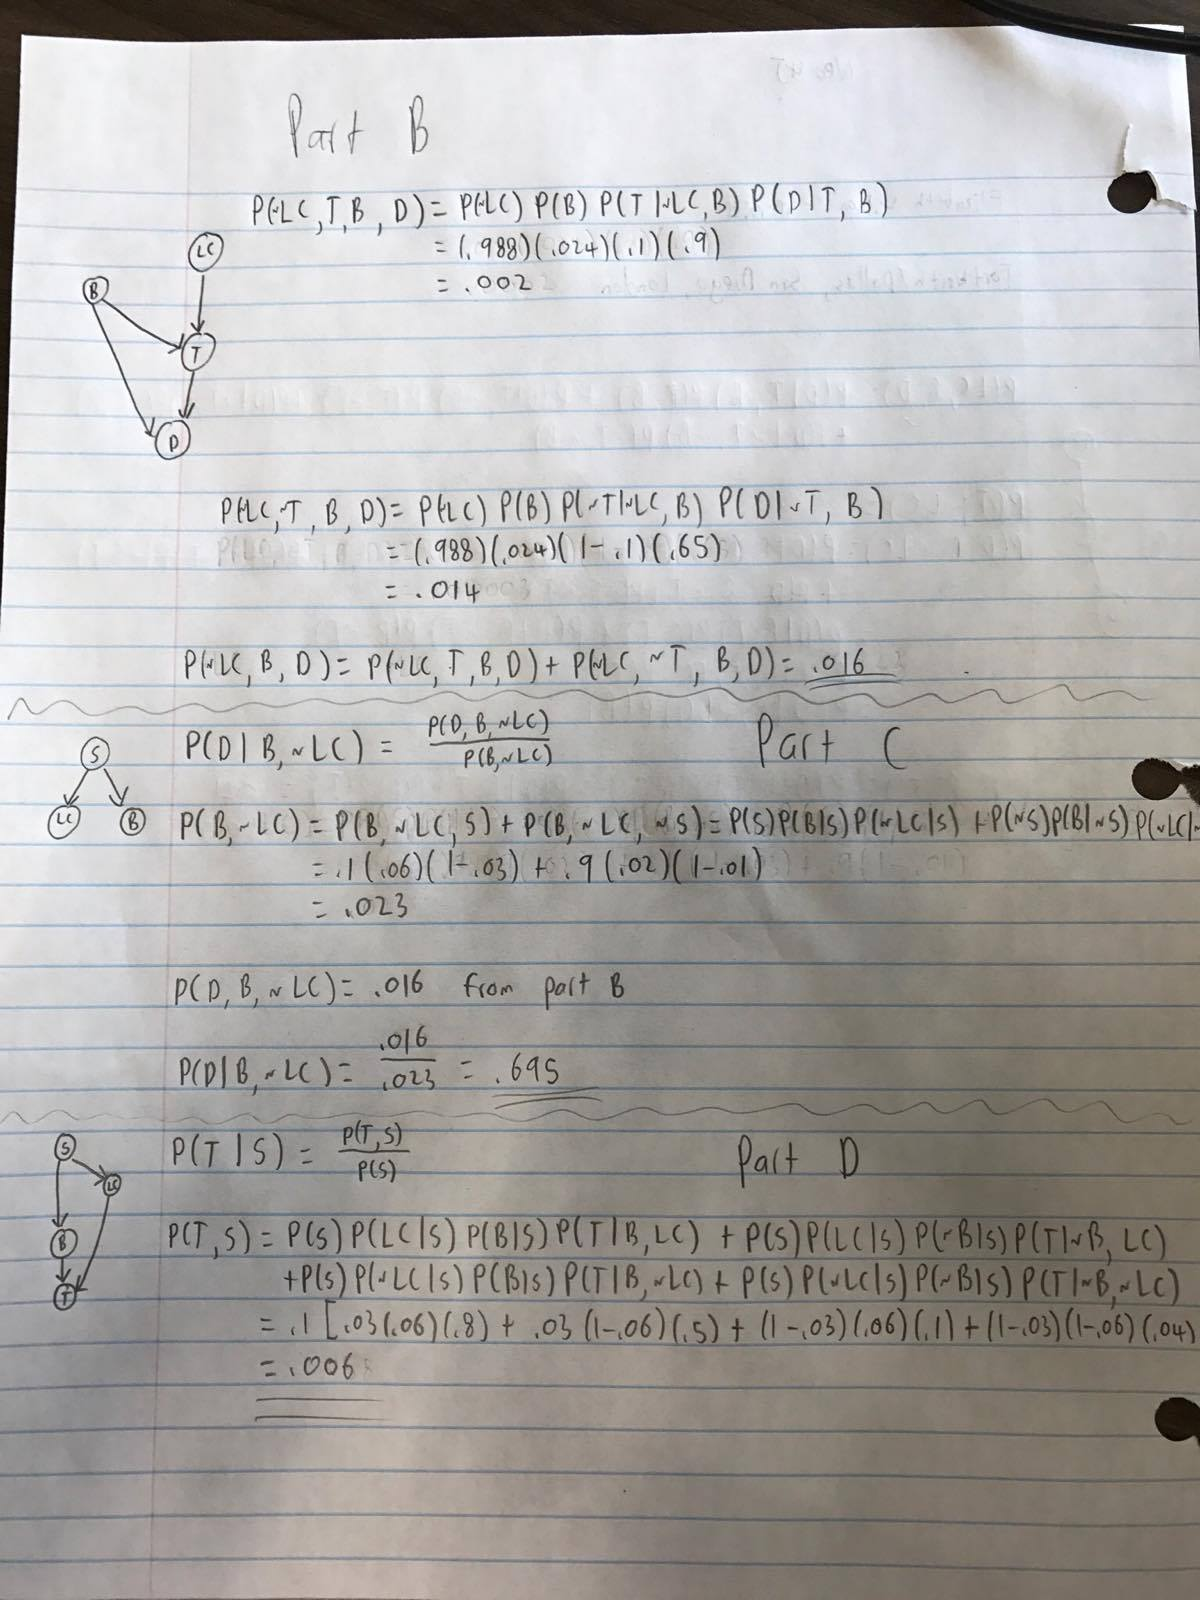

In [33]:
Image("PartBCD.JPG")

# Question 3 - Logistic Regression Classification (15pts)

Using the MNIST dataset in Q1, the goal is to build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

### Cells copied from Q1

In [34]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [36]:
idx = (y_train == 8) + (y_train==9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-8)

idx = (y_test == 8) + (y_test==9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800L, 784L), (11800L,), (1983L, 784L), (1983L,))


1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

## Solutions

## Part 1

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_model = LogisticRegression(penalty='l2', C=1000000.)
result = log_model.fit(X_train, y_train)

prediction_test = log_model.predict(X_test)

conf_mat = confusion_matrix(y_test, prediction_test)
print conf_mat

[[939  35]
 [ 35 974]]


In [38]:
y_0 = conf_mat.T[0][0]/float(sum(conf_mat.T[0]))
y_1 = conf_mat.T[1][1]/float(sum(conf_mat.T[1]))
print 'Prediction accuracy for negative class:', y_0
print 'Prediction accuracy for positive class:', y_1
print 'Average per-class accuracy:', (y_0+y_1)/2.

Prediction accuracy for negative class: 0.964065708419
Prediction accuracy for positive class: 0.965312190287
Average per-class accuracy: 0.964688949353


## Part 2

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import accuracy_score

def my_func(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

my_scorer = make_scorer(my_func, greater_is_better=True)

def do_search(penalty):
    model = LogisticRegression(penalty=penalty)

    best_model = GridSearchCV(model, scoring=my_scorer, cv=3, param_grid={"C": [0.01, 0.1, 1., 10. ,100.]})

    result = best_model.fit(X_train, y_train).best_params_
    return result['C']

In [40]:
part_2 = do_search('l2')
print 'Best result with penalty {} occurred with parameter C={}'.format('l2', part_2)

Best result with penalty l2 occurred with parameter C=1.0


## Part 3

In [41]:
print 'Best result with penalty {} occurred with parameter C={}'.format('l1', do_search('l1'))

Best result with penalty l1 occurred with parameter C=1.0


## Part 4

In [42]:
#re-set train/test data to before filtering for digits
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

final_model = LogisticRegression(penalty='l2', C=part_2, solver='newton-cg', multi_class='multinomial')
result = final_model.fit(X_train, y_train)

pred_final = final_model.predict(X_test)

conf_mat = confusion_matrix(y_test, pred_final)
print accuracy_score(y_test, pred_final)
print conf_mat

0.9256
[[ 955    0    2    4    1   10    4    3    1    0]
 [   0 1110    5    2    0    2    3    2   11    0]
 [   6    9  930   14   10    3   12   10   34    4]
 [   4    1   16  925    1   23    2   10   19    9]
 [   1    3    7    3  921    0    6    5    6   30]
 [   9    2    3   35   10  777   15    6   31    4]
 [   8    3    8    2    6   16  912    2    1    0]
 [   1    7   23    7    6    1    0  947    4   32]
 [   9   11    6   22    7   29   13   10  855   12]
 [   9    8    1    9   21    7    0   21    9  924]]


# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary (in terms of millions, ie Salary / 1000000 ) using all the numeric performance variables available ( so everything but Player, Team, and Position ). 

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

## Solutions

### Import data and split into explanatory and response variables, before into train/test

In [43]:
data = pd.read_csv('nbasalariesfull.csv')
X=data[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA','3P%', '2P', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PSG']]
data['alter_SALARY'] = data['SALARY']/1000000
y=data['alter_SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Import correct packages

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Part A

In [45]:
regr = DecisionTreeRegressor(max_depth=6)
deeptree = regr.fit(X_train, y_train)
deep_pred_train = regr.predict(X_train)
deep_pred_test = regr.predict(X_test)
train_mse = mean_squared_error(y_train, deep_pred_train)
test_mse = mean_squared_error(y_test, deep_pred_test)
print 'Train MSE:', train_mse
print 'Test MSE:', test_mse

Train MSE: 3.11530338435
Test MSE: 19.079439554


## Part B

In [46]:
shalregr = DecisionTreeRegressor(max_depth=2)
deeptree = shalregr.fit(X_train, y_train)
shal_pred_train = shalregr.predict(X_train)
shal_pred_test = shalregr.predict(X_test)
shal_train_mse = mean_squared_error(y_train, shal_pred_train)
shal_test_mse = mean_squared_error(y_test, shal_pred_test)
print 'Shallow Train MSE:', shal_train_mse
print 'Shallow Test MSE:', shal_test_mse

Shallow Train MSE: 12.1381635555
Shallow Test MSE: 16.8555751673


## Part C

The tree with a max-depth of 6 has a lower training set MSE which is expected as by allowing it to have a greater number of splits you allow it to really capture a lot of information of the data. However by having it with such a depth it can lead it to overfit the data, as it does in this instance. The Test MSE is far greater than the train MSE and when compared with the test MSE of the tree with a depth of two it is actually higher due to the overfitting(21.3 v 16.8). Although the tree with a depth of two has a higher training set MSE it actually works better when considering the test values, so it has a higher degree of predictive validity. 

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and differences between AUC and Lift Curves.

## Solution

In an ROC curve, the X axis represents the false positive rate and the Y axis represents the true positive rate, both ranging from 0 to 1. A random assignment would produce a 45 degree line from (0,0) to 1,1). A better prediction engine produces a bowed curve, reminiscent of sqrt(x) graph. Ideally, the true positive rate would be 1 and the false positive rate would be 0, so the higher the curve is (the more prominent the bowing), the better.

AUC is the area under the ROC curve. For a perfect model, AUC would be 1. A purely random model (45 degree line) would produce an AUC of 0.5.

A lift curve similarly represents model accuracy. However, the lift curve takes into account the innate distribution of classes in the dataset. The X axis is now the proportion of total population, sorted by class. The Y axis is still the true positive rate. Rather than one curved line as in the ROC curve, the lift curve is piecewise function, with a line steeper than y=x for the proportion of the total population that is the positive class, followed by a line y=1 for the rest of the dataset. Most importantly, the lift curve can be used to identify what percentage of the target class can be identified with the smallest possible group of data points.